# Feature Description

1.2 Features Description

__Categorical Attributes__

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
sex: Female, Male.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

__Continuous Attributes__

age: continuous.
Age of an individual
fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
Individual's working hour per week

# Import Libraries

In [1]:
#!pip install sklearn


In [2]:
import numpy as np 
import pandas as pd 
import sys
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc, classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import Imputer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [4]:
df_income = pd.read_csv('./income_evaluation.csv')
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_income.shape

(32561, 15)

# EDA

In [6]:
df_income.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
df_income.loc[:, [' workclass', ' education', 
       ' marital-status', ' occupation', ' relationship', ' race', ' sex'
       ]] [:10]

,workclass,education,marital-status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [8]:
df_income[' income'].head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name:  income, dtype: object

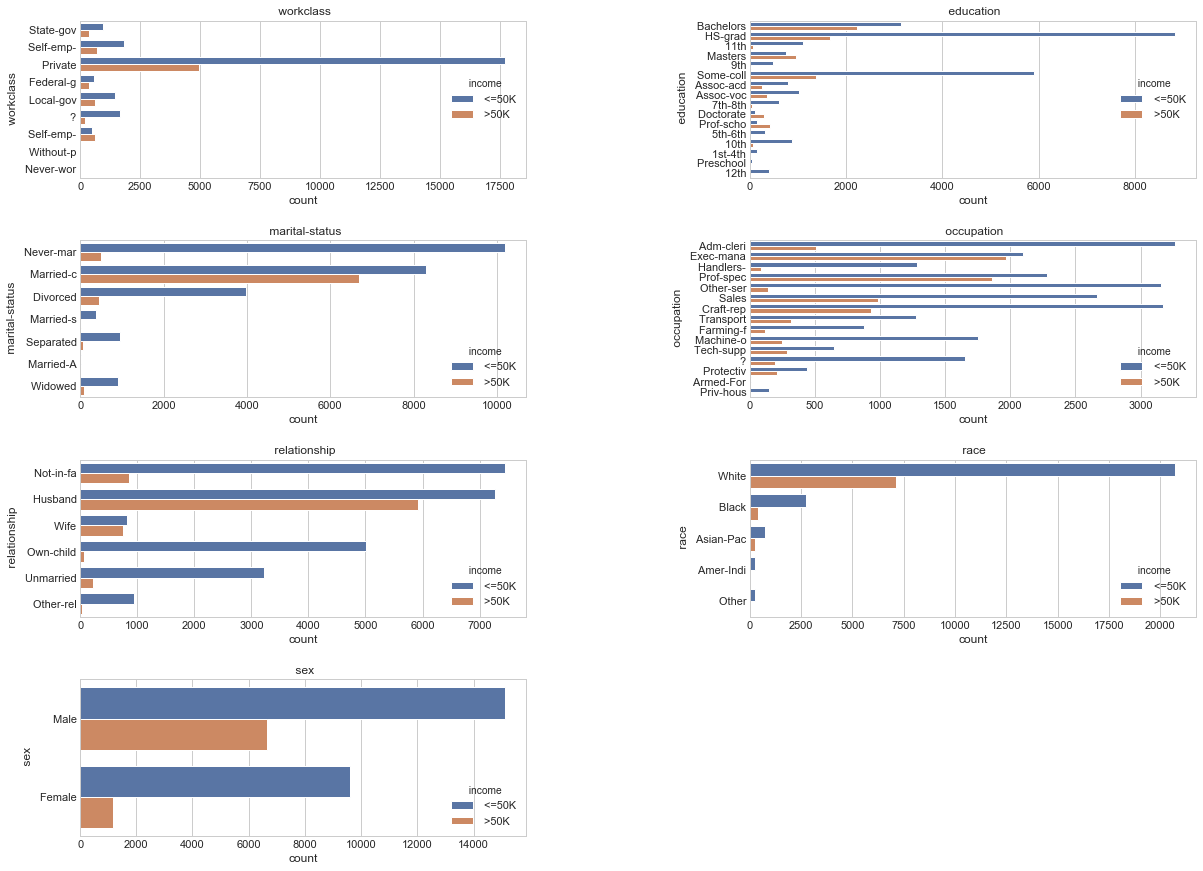

In [9]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df_income.loc[:, [' workclass', ' education', 
       ' marital-status', ' occupation', ' relationship', ' race', ' sex'
       ]]  

plot_bivariate_bar(bivariate_df, hue=df_income[' income'], cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

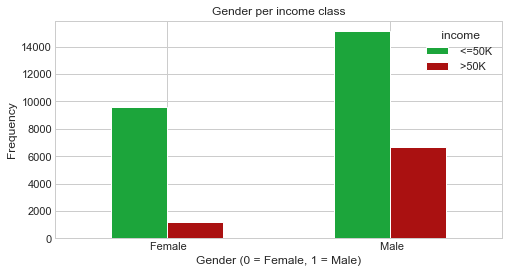

In [10]:
pd.crosstab(df_income[' sex'],df_income[' income']).plot(kind="bar",figsize=(8,4),color=['#1CA53B','#AA1111' ])
plt.title('Gender per income class')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


# Lazy Predict 
> Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning

Free software: MIT license
Documentation: https://lazypredict.readthedocs.io.

#### Documentation

> URL: https://lazypredict.readthedocs.io/en/latest/installation.html

#### Author
> Shankar Rao Pandala

#### pip install

In [11]:
#!pip install lazypredict
#!pip install catboost
#!pip install xgboost
#!pip install lightgbm
#!pip install --upgrade scikit-learn

#### Import Library

In [12]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
enable_hist_gradient_boosting
import scipy
from sklearn.utils import deprecated
from sklearn.utils._fast_dict import IntFloatDict
from sklearn.utils.fixes import _astype_copy_false

In [19]:
import lazypredict
from lazypredict.Supervised import LazyClassifier   #LazyRegressor
from sklearn.model_selection import train_test_split

import sys

### Classification Example - US Census Income

In [23]:
y= df_income[' income']
X = df_income.drop(' income', axis=1)
display(y.tail())
display(X.head())

32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name:  income, dtype: object

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [21]:
# Create train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [03:59<00:07,  7.33s/it]

Learning rate set to 0.0369
0:	learn: 0.6527648	total: 34.6ms	remaining: 34.6s
1:	learn: 0.6183932	total: 59.5ms	remaining: 29.7s
2:	learn: 0.5861870	total: 113ms	remaining: 37.5s
3:	learn: 0.5620045	total: 131ms	remaining: 32.7s
4:	learn: 0.5382423	total: 164ms	remaining: 32.6s
5:	learn: 0.5185402	total: 196ms	remaining: 32.4s
6:	learn: 0.5012780	total: 212ms	remaining: 30s
7:	learn: 0.4838592	total: 234ms	remaining: 29s
8:	learn: 0.4673291	total: 253ms	remaining: 27.9s
9:	learn: 0.4523058	total: 269ms	remaining: 26.7s
10:	learn: 0.4408429	total: 284ms	remaining: 25.5s
11:	learn: 0.4309738	total: 309ms	remaining: 25.4s
12:	learn: 0.4204004	total: 327ms	remaining: 24.8s
13:	learn: 0.4113542	total: 347ms	remaining: 24.5s
14:	learn: 0.4040082	total: 362ms	remaining: 23.8s
15:	learn: 0.3980360	total: 380ms	remaining: 23.4s
16:	learn: 0.3910113	total: 407ms	remaining: 23.5s
17:	learn: 0.3849619	total: 439ms	remaining: 23.9s
18:	learn: 0.3795712	total: 469ms	remaining: 24.2s
19:	learn: 0.37

161:	learn: 0.2844500	total: 3.29s	remaining: 17s
162:	learn: 0.2843295	total: 3.3s	remaining: 17s
163:	learn: 0.2841968	total: 3.32s	remaining: 16.9s
164:	learn: 0.2840546	total: 3.33s	remaining: 16.9s
165:	learn: 0.2839551	total: 3.35s	remaining: 16.9s
166:	learn: 0.2838694	total: 3.37s	remaining: 16.8s
167:	learn: 0.2837277	total: 3.38s	remaining: 16.8s
168:	learn: 0.2836184	total: 3.4s	remaining: 16.7s
169:	learn: 0.2834854	total: 3.43s	remaining: 16.8s
170:	learn: 0.2833929	total: 3.45s	remaining: 16.7s
171:	learn: 0.2832476	total: 3.49s	remaining: 16.8s
172:	learn: 0.2831533	total: 3.5s	remaining: 16.8s
173:	learn: 0.2829677	total: 3.53s	remaining: 16.8s
174:	learn: 0.2827359	total: 3.54s	remaining: 16.7s
175:	learn: 0.2826614	total: 3.56s	remaining: 16.7s
176:	learn: 0.2825637	total: 3.58s	remaining: 16.6s
177:	learn: 0.2824510	total: 3.59s	remaining: 16.6s
178:	learn: 0.2822650	total: 3.61s	remaining: 16.6s
179:	learn: 0.2821651	total: 3.64s	remaining: 16.6s
180:	learn: 0.28200

320:	learn: 0.2642586	total: 6.45s	remaining: 13.6s
321:	learn: 0.2641492	total: 6.47s	remaining: 13.6s
322:	learn: 0.2638968	total: 6.48s	remaining: 13.6s
323:	learn: 0.2638242	total: 6.5s	remaining: 13.6s
324:	learn: 0.2637553	total: 6.51s	remaining: 13.5s
325:	learn: 0.2636295	total: 6.53s	remaining: 13.5s
326:	learn: 0.2635745	total: 6.54s	remaining: 13.5s
327:	learn: 0.2635333	total: 6.56s	remaining: 13.4s
328:	learn: 0.2633331	total: 6.6s	remaining: 13.5s
329:	learn: 0.2632166	total: 6.62s	remaining: 13.4s
330:	learn: 0.2631114	total: 6.63s	remaining: 13.4s
331:	learn: 0.2630585	total: 6.64s	remaining: 13.4s
332:	learn: 0.2629541	total: 6.66s	remaining: 13.3s
333:	learn: 0.2628442	total: 6.67s	remaining: 13.3s
334:	learn: 0.2625697	total: 6.69s	remaining: 13.3s
335:	learn: 0.2625075	total: 6.71s	remaining: 13.3s
336:	learn: 0.2623994	total: 6.73s	remaining: 13.2s
337:	learn: 0.2622989	total: 6.75s	remaining: 13.2s
338:	learn: 0.2622283	total: 6.76s	remaining: 13.2s
339:	learn: 0.

479:	learn: 0.2500389	total: 9.26s	remaining: 10s
480:	learn: 0.2499434	total: 9.28s	remaining: 10s
481:	learn: 0.2499076	total: 9.31s	remaining: 10s
482:	learn: 0.2498446	total: 9.33s	remaining: 9.98s
483:	learn: 0.2497742	total: 9.35s	remaining: 9.96s
484:	learn: 0.2497115	total: 9.36s	remaining: 9.94s
485:	learn: 0.2496498	total: 9.37s	remaining: 9.91s
486:	learn: 0.2496059	total: 9.39s	remaining: 9.89s
487:	learn: 0.2495436	total: 9.4s	remaining: 9.87s
488:	learn: 0.2494892	total: 9.42s	remaining: 9.84s
489:	learn: 0.2494196	total: 9.44s	remaining: 9.82s
490:	learn: 0.2493010	total: 9.45s	remaining: 9.8s
491:	learn: 0.2492717	total: 9.48s	remaining: 9.79s
492:	learn: 0.2491920	total: 9.5s	remaining: 9.77s
493:	learn: 0.2490502	total: 9.52s	remaining: 9.75s
494:	learn: 0.2489908	total: 9.54s	remaining: 9.73s
495:	learn: 0.2488995	total: 9.56s	remaining: 9.71s
496:	learn: 0.2488489	total: 9.57s	remaining: 9.69s
497:	learn: 0.2487715	total: 9.59s	remaining: 9.67s
498:	learn: 0.2486967

638:	learn: 0.2399730	total: 12.2s	remaining: 6.9s
639:	learn: 0.2399199	total: 12.2s	remaining: 6.88s
640:	learn: 0.2398401	total: 12.3s	remaining: 6.86s
641:	learn: 0.2397829	total: 12.3s	remaining: 6.84s
642:	learn: 0.2397452	total: 12.3s	remaining: 6.82s
643:	learn: 0.2396392	total: 12.3s	remaining: 6.8s
644:	learn: 0.2395733	total: 12.3s	remaining: 6.78s
645:	learn: 0.2395399	total: 12.3s	remaining: 6.75s
646:	learn: 0.2395005	total: 12.4s	remaining: 6.74s
647:	learn: 0.2394057	total: 12.4s	remaining: 6.72s
648:	learn: 0.2393690	total: 12.4s	remaining: 6.7s
649:	learn: 0.2393183	total: 12.4s	remaining: 6.68s
650:	learn: 0.2392696	total: 12.4s	remaining: 6.66s
651:	learn: 0.2391136	total: 12.4s	remaining: 6.64s
652:	learn: 0.2390339	total: 12.4s	remaining: 6.62s
653:	learn: 0.2390107	total: 12.5s	remaining: 6.59s
654:	learn: 0.2389412	total: 12.5s	remaining: 6.58s
655:	learn: 0.2388794	total: 12.5s	remaining: 6.56s
656:	learn: 0.2388514	total: 12.5s	remaining: 6.54s
657:	learn: 0.2

797:	learn: 0.2309048	total: 15s	remaining: 3.79s
798:	learn: 0.2308954	total: 15s	remaining: 3.77s
799:	learn: 0.2308582	total: 15s	remaining: 3.75s
800:	learn: 0.2308044	total: 15s	remaining: 3.74s
801:	learn: 0.2307305	total: 15.1s	remaining: 3.72s
802:	learn: 0.2307167	total: 15.1s	remaining: 3.7s
803:	learn: 0.2306578	total: 15.1s	remaining: 3.68s
804:	learn: 0.2305914	total: 15.1s	remaining: 3.66s
805:	learn: 0.2305163	total: 15.1s	remaining: 3.64s
806:	learn: 0.2304793	total: 15.1s	remaining: 3.62s
807:	learn: 0.2304263	total: 15.2s	remaining: 3.6s
808:	learn: 0.2303725	total: 15.2s	remaining: 3.58s
809:	learn: 0.2303319	total: 15.2s	remaining: 3.56s
810:	learn: 0.2302635	total: 15.2s	remaining: 3.54s
811:	learn: 0.2302116	total: 15.2s	remaining: 3.52s
812:	learn: 0.2301722	total: 15.2s	remaining: 3.5s
813:	learn: 0.2301397	total: 15.2s	remaining: 3.48s
814:	learn: 0.2300701	total: 15.3s	remaining: 3.47s
815:	learn: 0.2300447	total: 15.3s	remaining: 3.45s
816:	learn: 0.2299984	t

956:	learn: 0.2232423	total: 17.8s	remaining: 800ms
957:	learn: 0.2232030	total: 17.8s	remaining: 782ms
958:	learn: 0.2231538	total: 17.8s	remaining: 763ms
959:	learn: 0.2230958	total: 17.9s	remaining: 744ms
960:	learn: 0.2230472	total: 17.9s	remaining: 726ms
961:	learn: 0.2230090	total: 17.9s	remaining: 707ms
962:	learn: 0.2229803	total: 17.9s	remaining: 689ms
963:	learn: 0.2229284	total: 17.9s	remaining: 670ms
964:	learn: 0.2228974	total: 18s	remaining: 651ms
965:	learn: 0.2228779	total: 18s	remaining: 633ms
966:	learn: 0.2228592	total: 18s	remaining: 614ms
967:	learn: 0.2228031	total: 18s	remaining: 595ms
968:	learn: 0.2227367	total: 18s	remaining: 577ms
969:	learn: 0.2226680	total: 18s	remaining: 558ms
970:	learn: 0.2226331	total: 18.1s	remaining: 539ms
971:	learn: 0.2226081	total: 18.1s	remaining: 520ms
972:	learn: 0.2225895	total: 18.1s	remaining: 502ms
973:	learn: 0.2225360	total: 18.1s	remaining: 483ms
974:	learn: 0.2224939	total: 18.1s	remaining: 465ms
975:	learn: 0.2224269	to

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [04:22<00:00, 11.84s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.80,None,0.87,1.26
CatBoostClassifier,0.87,0.80,None,0.87,22.35
NearestCentroid,0.79,0.79,None,0.80,0.81
Perceptron,0.76,0.79,None,0.77,0.57
BernoulliNB,0.78,0.78,None,0.79,0.67
PassiveAggressiveClassifier,0.77,0.78,None,0.79,0.73
AdaBoostClassifier,0.86,0.77,None,0.85,5.22
RandomForestClassifier,0.85,0.77,None,0.85,4.27
XGBClassifier,0.86,0.77,None,0.86,8.92


### Classification Example - Breast Cancer

In [25]:
>>> from lazypredict.Supervised import LazyClassifier
>>> from sklearn.datasets import load_breast_cancer
>>> from sklearn.model_selection import train_test_split
>>> data = load_breast_cancer()
>>> X = data.data
>>> y= data.target
>>> X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
>>> clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
>>> models,predictions = clf.fit(X_train, X_test, y_train, y_test)
>>> models

 94%|████████████████████████████████████████████████████████████████████████████▋     | 29/31 [00:01<00:00, 16.44it/s]

Learning rate set to 0.011733
0:	learn: 0.6758733	total: 12.7ms	remaining: 12.7s
1:	learn: 0.6606823	total: 24ms	remaining: 12s
2:	learn: 0.6417222	total: 32.7ms	remaining: 10.9s
3:	learn: 0.6265033	total: 52.4ms	remaining: 13.1s
4:	learn: 0.6098680	total: 63.3ms	remaining: 12.6s
5:	learn: 0.5970087	total: 72.8ms	remaining: 12.1s
6:	learn: 0.5819678	total: 82.5ms	remaining: 11.7s
7:	learn: 0.5695034	total: 92.7ms	remaining: 11.5s
8:	learn: 0.5557894	total: 110ms	remaining: 12.2s
9:	learn: 0.5430678	total: 121ms	remaining: 12s
10:	learn: 0.5292540	total: 130ms	remaining: 11.7s
11:	learn: 0.5164321	total: 139ms	remaining: 11.4s
12:	learn: 0.5039690	total: 149ms	remaining: 11.3s
13:	learn: 0.4928429	total: 171ms	remaining: 12s
14:	learn: 0.4817866	total: 181ms	remaining: 11.9s
15:	learn: 0.4715508	total: 191ms	remaining: 11.7s
16:	learn: 0.4627676	total: 199ms	remaining: 11.5s
17:	learn: 0.4537097	total: 210ms	remaining: 11.5s
18:	learn: 0.4439790	total: 220ms	remaining: 11.3s
19:	learn: 

160:	learn: 0.0688011	total: 1.9s	remaining: 9.92s
161:	learn: 0.0682675	total: 1.91s	remaining: 9.9s
162:	learn: 0.0678589	total: 1.92s	remaining: 9.88s
163:	learn: 0.0673395	total: 1.93s	remaining: 9.85s
164:	learn: 0.0666924	total: 1.94s	remaining: 9.83s
165:	learn: 0.0661997	total: 1.95s	remaining: 9.8s
166:	learn: 0.0656382	total: 1.96s	remaining: 9.79s
167:	learn: 0.0650517	total: 1.97s	remaining: 9.76s
168:	learn: 0.0644796	total: 1.98s	remaining: 9.74s
169:	learn: 0.0638754	total: 1.99s	remaining: 9.72s
170:	learn: 0.0633817	total: 2.01s	remaining: 9.74s
171:	learn: 0.0629347	total: 2.02s	remaining: 9.73s
172:	learn: 0.0624711	total: 2.03s	remaining: 9.71s
173:	learn: 0.0620836	total: 2.04s	remaining: 9.69s
174:	learn: 0.0617742	total: 2.05s	remaining: 9.67s
175:	learn: 0.0613533	total: 2.06s	remaining: 9.64s
176:	learn: 0.0609113	total: 2.07s	remaining: 9.62s
177:	learn: 0.0604213	total: 2.08s	remaining: 9.6s
178:	learn: 0.0600112	total: 2.09s	remaining: 9.57s
179:	learn: 0.05

319:	learn: 0.0269320	total: 3.8s	remaining: 8.08s
320:	learn: 0.0268006	total: 3.81s	remaining: 8.06s
321:	learn: 0.0267049	total: 3.82s	remaining: 8.05s
322:	learn: 0.0265497	total: 3.83s	remaining: 8.03s
323:	learn: 0.0263982	total: 3.84s	remaining: 8.02s
324:	learn: 0.0262941	total: 3.85s	remaining: 8s
325:	learn: 0.0261763	total: 3.87s	remaining: 8.01s
326:	learn: 0.0260722	total: 3.88s	remaining: 7.99s
327:	learn: 0.0259552	total: 3.89s	remaining: 7.98s
328:	learn: 0.0258541	total: 3.9s	remaining: 7.96s
329:	learn: 0.0257577	total: 3.91s	remaining: 7.95s
330:	learn: 0.0256681	total: 3.92s	remaining: 7.93s
331:	learn: 0.0255162	total: 3.93s	remaining: 7.92s
332:	learn: 0.0254378	total: 3.95s	remaining: 7.92s
333:	learn: 0.0253731	total: 3.96s	remaining: 7.9s
334:	learn: 0.0252752	total: 3.97s	remaining: 7.89s
335:	learn: 0.0251789	total: 3.98s	remaining: 7.87s
336:	learn: 0.0250668	total: 4s	remaining: 7.86s
337:	learn: 0.0249831	total: 4s	remaining: 7.84s
338:	learn: 0.0248931	to

478:	learn: 0.0147329	total: 5.71s	remaining: 6.21s
479:	learn: 0.0146891	total: 5.72s	remaining: 6.2s
480:	learn: 0.0146415	total: 5.73s	remaining: 6.19s
481:	learn: 0.0146048	total: 5.74s	remaining: 6.17s
482:	learn: 0.0145529	total: 5.75s	remaining: 6.16s
483:	learn: 0.0145315	total: 5.76s	remaining: 6.14s
484:	learn: 0.0144818	total: 5.78s	remaining: 6.13s
485:	learn: 0.0144313	total: 5.79s	remaining: 6.12s
486:	learn: 0.0143917	total: 5.81s	remaining: 6.12s
487:	learn: 0.0143538	total: 5.83s	remaining: 6.12s
488:	learn: 0.0143219	total: 5.84s	remaining: 6.1s
489:	learn: 0.0142708	total: 5.85s	remaining: 6.09s
490:	learn: 0.0142097	total: 5.87s	remaining: 6.08s
491:	learn: 0.0141221	total: 5.88s	remaining: 6.07s
492:	learn: 0.0140947	total: 5.89s	remaining: 6.05s
493:	learn: 0.0140497	total: 5.9s	remaining: 6.04s
494:	learn: 0.0139926	total: 5.91s	remaining: 6.03s
495:	learn: 0.0139426	total: 5.92s	remaining: 6.02s
496:	learn: 0.0139040	total: 5.93s	remaining: 6s
497:	learn: 0.0138

637:	learn: 0.0092491	total: 7.72s	remaining: 4.38s
638:	learn: 0.0092258	total: 7.73s	remaining: 4.37s
639:	learn: 0.0092219	total: 7.74s	remaining: 4.36s
640:	learn: 0.0091884	total: 7.75s	remaining: 4.34s
641:	learn: 0.0091622	total: 7.76s	remaining: 4.33s
642:	learn: 0.0091366	total: 7.78s	remaining: 4.32s
643:	learn: 0.0091240	total: 7.79s	remaining: 4.3s
644:	learn: 0.0091047	total: 7.8s	remaining: 4.29s
645:	learn: 0.0090741	total: 7.81s	remaining: 4.28s
646:	learn: 0.0090458	total: 7.82s	remaining: 4.26s
647:	learn: 0.0090261	total: 7.83s	remaining: 4.25s
648:	learn: 0.0090104	total: 7.84s	remaining: 4.24s
649:	learn: 0.0089866	total: 7.85s	remaining: 4.22s
650:	learn: 0.0089648	total: 7.86s	remaining: 4.21s
651:	learn: 0.0089365	total: 7.87s	remaining: 4.2s
652:	learn: 0.0089206	total: 7.88s	remaining: 4.19s
653:	learn: 0.0088878	total: 7.89s	remaining: 4.18s
654:	learn: 0.0088589	total: 7.9s	remaining: 4.16s
655:	learn: 0.0088374	total: 7.91s	remaining: 4.15s
656:	learn: 0.00

796:	learn: 0.0065841	total: 9.64s	remaining: 2.46s
797:	learn: 0.0065812	total: 9.65s	remaining: 2.44s
798:	learn: 0.0065612	total: 9.66s	remaining: 2.43s
799:	learn: 0.0065546	total: 9.67s	remaining: 2.42s
800:	learn: 0.0065403	total: 9.68s	remaining: 2.41s
801:	learn: 0.0065242	total: 9.7s	remaining: 2.39s
802:	learn: 0.0065070	total: 9.71s	remaining: 2.38s
803:	learn: 0.0064876	total: 9.72s	remaining: 2.37s
804:	learn: 0.0064854	total: 9.73s	remaining: 2.36s
805:	learn: 0.0064720	total: 9.74s	remaining: 2.35s
806:	learn: 0.0064579	total: 9.78s	remaining: 2.34s
807:	learn: 0.0064513	total: 9.79s	remaining: 2.33s
808:	learn: 0.0064420	total: 9.8s	remaining: 2.31s
809:	learn: 0.0064326	total: 9.82s	remaining: 2.3s
810:	learn: 0.0064218	total: 9.83s	remaining: 2.29s
811:	learn: 0.0064128	total: 9.84s	remaining: 2.28s
812:	learn: 0.0064024	total: 9.85s	remaining: 2.26s
813:	learn: 0.0063996	total: 9.87s	remaining: 2.25s
814:	learn: 0.0063947	total: 9.88s	remaining: 2.24s
815:	learn: 0.0

955:	learn: 0.0050675	total: 11.6s	remaining: 536ms
956:	learn: 0.0050614	total: 11.7s	remaining: 524ms
957:	learn: 0.0050568	total: 11.7s	remaining: 512ms
958:	learn: 0.0050477	total: 11.7s	remaining: 500ms
959:	learn: 0.0050404	total: 11.7s	remaining: 488ms
960:	learn: 0.0050395	total: 11.7s	remaining: 475ms
961:	learn: 0.0050290	total: 11.7s	remaining: 463ms
962:	learn: 0.0050164	total: 11.7s	remaining: 451ms
963:	learn: 0.0050089	total: 11.8s	remaining: 439ms
964:	learn: 0.0049989	total: 11.8s	remaining: 427ms
965:	learn: 0.0049928	total: 11.8s	remaining: 415ms
966:	learn: 0.0049867	total: 11.8s	remaining: 403ms
967:	learn: 0.0049807	total: 11.8s	remaining: 390ms
968:	learn: 0.0049747	total: 11.8s	remaining: 378ms
969:	learn: 0.0049688	total: 11.8s	remaining: 366ms
970:	learn: 0.0049588	total: 11.8s	remaining: 354ms
971:	learn: 0.0049504	total: 11.9s	remaining: 342ms
972:	learn: 0.0049417	total: 11.9s	remaining: 329ms
973:	learn: 0.0049357	total: 11.9s	remaining: 317ms
974:	learn: 

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:16<00:00,  1.92it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.02
Perceptron,0.99,0.98,0.98,0.99,0.02
LogisticRegression,0.99,0.98,0.98,0.99,0.02
XGBClassifier,0.98,0.98,0.98,0.98,0.14
SVC,0.98,0.98,0.98,0.98,0.02
SGDClassifier,0.98,0.98,0.98,0.98,0.01
LabelSpreading,0.98,0.97,0.97,0.98,0.03
RandomForestClassifier,0.98,0.97,0.97,0.98,0.20
LabelPropagation,0.98,0.97,0.97,0.98,0.03
